In [1]:
%matplotlib inline
import os
import glob
import pylab
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5)
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.colors
from matplotlib.dates import date2num
from datetime import datetime

from pysurvey.plot import setup_sns as setup
from pysurvey.plot import minmax, icolorbar, density, legend, text, dateticks

In [42]:
# Only includes up to 2014
# df = pd.read_csv('/Users/ajmendez/data/reddit/subreddit_numbers_eachyear.csv')
# includes out to 2016
# df = pd.read_csv('/Users/ajmendez/data/reddit/subreddit_2_eachyear.csv')
df = pd.read_csv('/Users/ajmendez/data/reddit/subreddit_2_eachyear_v1.csv')
df

,Unnamed: 0,subreddit,year,bin,count,nauthor,age,ntotal,nunique,nyear,ngoodyear
0,0,zen,2016,1,1,2,2015,1,1,7,0
1,1,youtubecomments,2016,26,1,2,1990,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
11604,11604,WTF,2008,46,1,1,1962,1,1,9,0
11605,11605,reddit.com,2007,76,1,1,1931,1,1,5,0


In [47]:
df['age'] = df['year'] - df['bin']

In [4]:
# Update the unique, and totals for simple filtering.
df['ntotal'] = df['nunique'] = 0
for (subreddit, year), d in df.groupby(['subreddit', 'year']):
    isgood = (df['subreddit'] == subreddit) & (df['year'] == year)
    df.loc[isgood, ['ntotal', 'nunique']]  = np.sum(d['count']), len(d)

In [5]:
df['nyear'] = 0
for subreddit, d in df.groupby('subreddit'):
    isgood = (df['subreddit'] == subreddit)
    df.loc[isgood, 'nyear'] = len(np.unique(d['year']))

In [6]:
df['ngoodyear'] = 0
isgood = (df['ntotal'] > 10) & (df['nunique'] > 5)
for subreddit,d in df[isgood].groupby('subreddit'):
    df.loc[isgood & (df['subreddit'] == subreddit), 'ngoodyear'] = len(np.unique(d['year']))

In [7]:
# df.to_csv('/Users/ajmendez/data/reddit/subreddit_numbers_eachyear_v1.csv')
# df.to_csv('/Users/ajmendez/data/reddit/subreddit_2_eachyear_v1.csv')

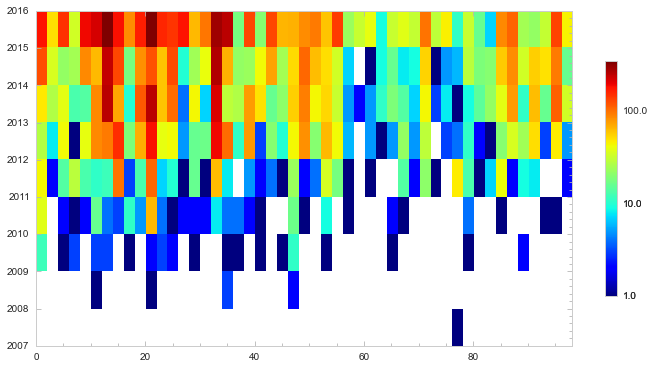

In [26]:
ax = setup(figsize=(12,6))
ax.get_yaxis().get_major_formatter().set_useOffset(False)
den = density(df['bin'], df['year'], weights=df['count'], 
              bins=(np.arange(0, 100, 2), np.arange(2007, 2017,1)),
#               ynorm=True,
              cmap=pylab.cm.jet, logvrange=True,
                   )

In [21]:
numbers = df[df['year'] != 2007]

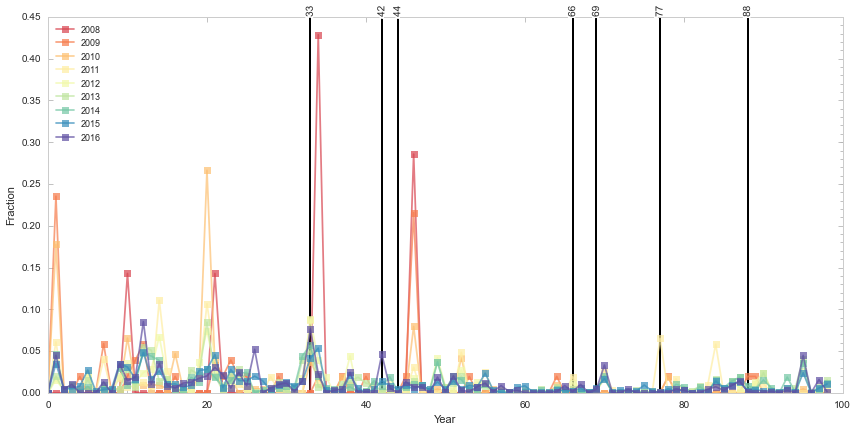

In [33]:
yearnorm = matplotlib.colors.Normalize(2007,2016)
bins = np.arange(0, 100, 1)
setup(figsize=(12,6))
values = [33,44,66,77,88,69,42]

for k,(year, d) in enumerate(numbers.groupby('year'),1):
    color = pylab.cm.Spectral(yearnorm(year))
    ax = setup(xlabel='Year', ylabel='Fraction')
    v,l = np.histogram(d['bin'], bins=bins, weights=d['count'])
    pylab.plot(l[:-1], v*1.0/np.sum(v),  '-s', alpha=0.7, color=color, label=year)
    for value in values:
        pylab.axvline(value, color='k', alpha=0.5, zorder=-2)
        text(value, 0.45, value, rotation=90, ha='center', va='bottom')
legend(ax=ax, loc=2)
pylab.tight_layout()

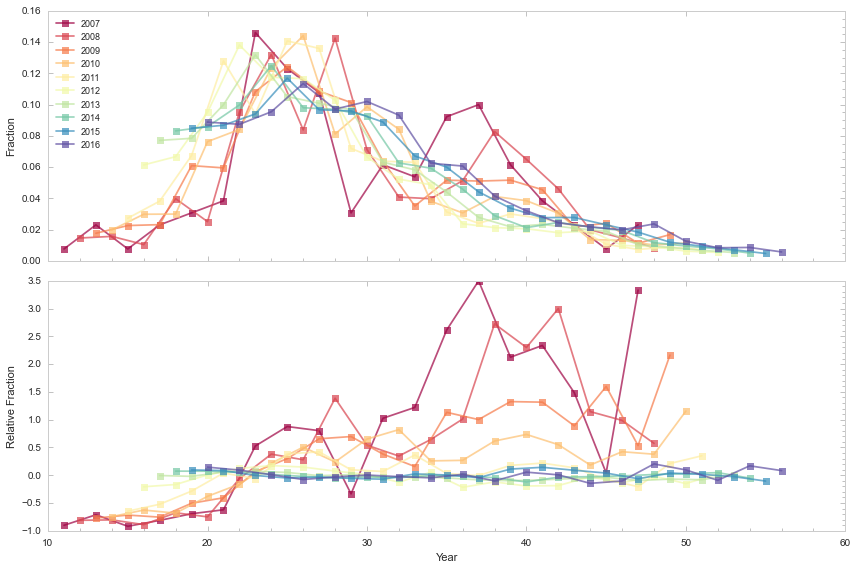

In [312]:
yearnorm = matplotlib.colors.Normalize(2007,2016)
bins = np.arange(1960, 2000, 2)

V,L = np.histogram(numbers['bin'], bins=bins, weights=numbers['count'])
setup(figsize=(12,8))
for k,(year, d) in enumerate(numbers.groupby('year'),1):
    color = pylab.cm.Spectral(yearnorm(year))
    ax = setup(subplt=(2,1,1), xlabel='Year', ylabel='Fraction', xticks=False)
    v,l = np.histogram(d['bin'], bins=bins, weights=d['count'])
    pylab.plot(year-l[:-1], v*1.0/np.sum(v),  '-s', alpha=0.7, color=color, label=year)
    
    
    ax2 = setup(subplt=(2,1,2), xlabel='Year', ylabel='Relative Fraction')
    pylab.plot(year-l[:-1], v*1.0/np.sum(v) / (V*1.0 / np.sum(V)) - 1,  '-s', alpha=0.7, color=color, label=year)
    
legend(ax=ax, loc=2)
pylab.tight_layout()

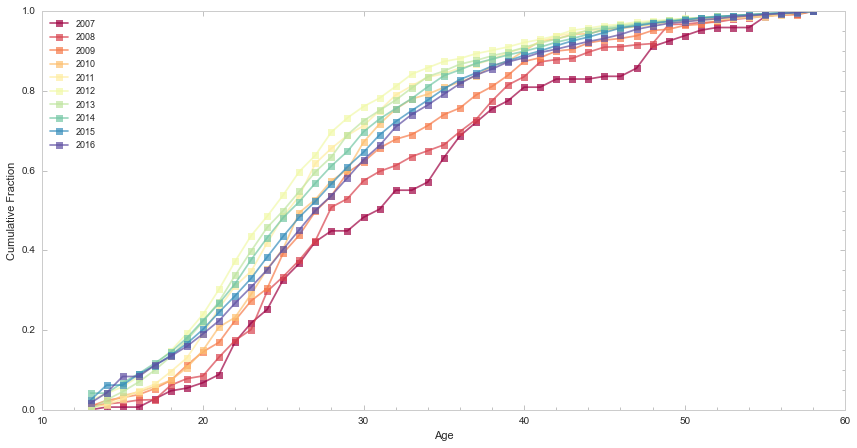

In [303]:
## yearnorm = matplotlib.colors.Normalize(2007,2016)


setup(figsize=(12,12))
out = np.zeros( (3, 10) )
for k,(year, d) in enumerate(numbers.groupby('year')):
    ax = setup(subplt=(2,1,1), xlabel='Age', ylabel='Cumulative Fraction', xticks=True)
#     pylab.axhline(0.5)
    color = pylab.cm.Spectral(yearnorm(year))
    bins = np.arange(13,60,1)
    v,l = np.histogram(d['year'] - d['bin'], bins=bins, weights=d['count'])
    
    x = l[:-1]
    y = np.cumsum(v)*1.0/np.sum(v)
    
#     avg = np.average(year-d['bin'], weights=d['count'])
    avg = np.interp([0.25, 0.5, 0.75], y, x)
#     pylab.plot(avg, 0.5, 's', markersize=20, color=color)
    out[:, k] = year, avg[1], (avg[2]-avg[0])/2.0
#     pylab.axvline(avg, lw=2, alpha=0.5, color=color)
    pylab.plot(x, y,  '-s', alpha=0.7,
                   color=color, label=year)

    
legend(loc=2)
pylab.tight_layout()

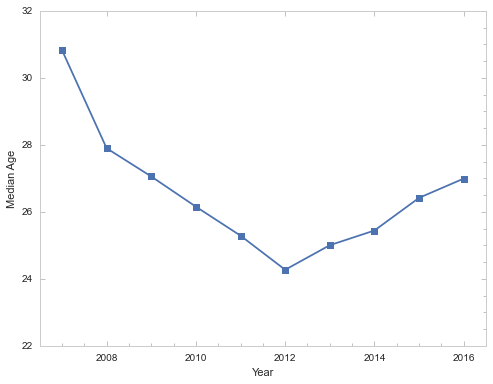

In [290]:
ax = setup(figsize=(8,6), 
           xlabel='Year', xr=[2006.5, 2016.5], 
           ylabel='Median Age', yr=[22, 32])
ax.get_xaxis().get_major_formatter().set_useOffset(False)
pylab.plot(out[0], out[1], '-s')

In [313]:
numbers = df[(df['ngoodyear'] == 10) & (df['year'] != 2000) & (df['year'] != 2001) ]
print np.unique(numbers['subreddit']), len(np.unique(numbers['subreddit']))

['entertainment' 'politics' 'programming' 'science'] 4


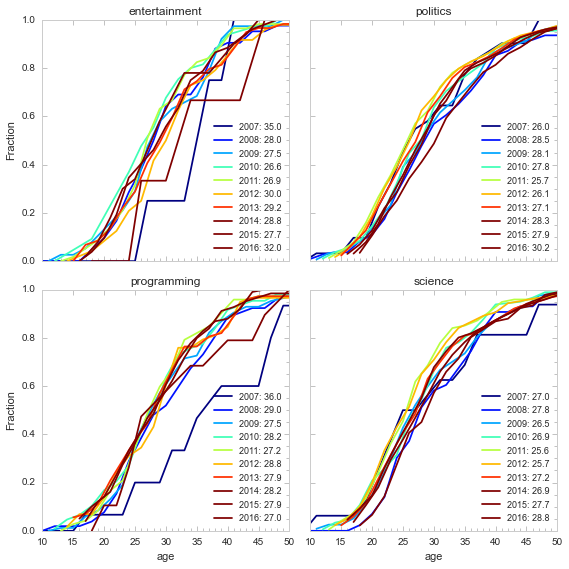

In [314]:
yearnorm = matplotlib.colors.Normalize(2007,2014)
setup(figsize=(8,8))
for k,(subreddit, d) in enumerate(numbers.groupby('subreddit'),1):
    ax = setup(subplt=(2,2,k), title=subreddit, autoticks=True,
              xlabel='age', xr=[10,50], 
               ylabel='Fraction', yr=[0,1])
#     pylab.axvspan(-20, 20, color='0.5', alpha=0.3, zorder=-2),
    for i, (year, e) in enumerate(d.groupby('year')):
        bins = np.arange(year-1998,60, 2)
        v,l = np.histogram(e['year'] - e['bin'], bins=bins, weights=e['count'])
        y = np.cumsum(v)*1.0/v.sum()
        age = np.interp([0.5], y, l[:-1])[0]
        pylab.plot(l[:-1], y,
                   color=pylab.cm.jet(yearnorm(year)), 
                   label='{}: {:0.1f}'.format(year, age))
    legend(loc=4)
#     break
pylab.tight_layout()

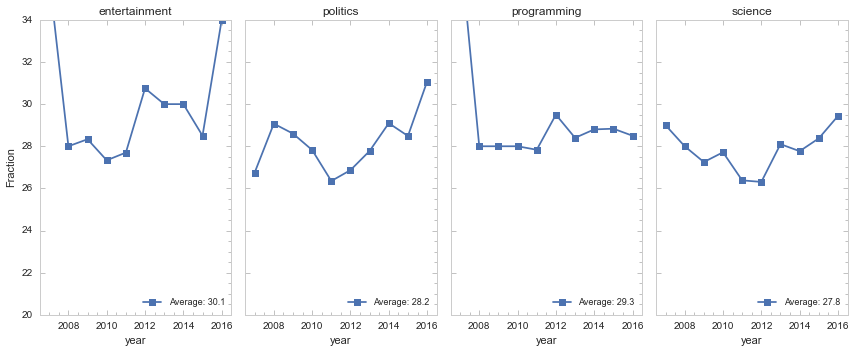

In [315]:
yearnorm = matplotlib.colors.Normalize(2007,2014)
setup(figsize=(12,5))
for k,(subreddit, d) in enumerate(numbers.groupby('subreddit'),1):
    ax = setup(subplt=(1,4,k), title=subreddit, autoticks=True,
              xlabel='year', xr=[2006.5,2016.5], 
               ylabel='Fraction', yr=[20,34])
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    
    out = np.zeros( (2, 10) )
    for i, (year, e) in enumerate(d.groupby('year')):
        bins = np.arange(year-1999,60, 1)
        v,l = np.histogram(e['year'] - e['bin'], bins=bins, weights=e['count'])
        x, y = l[:-1], np.cumsum(v)*1.0/np.sum(v)
        avg = np.interp([0.5], y, x)
        out[:, i] = year, avg
    pylab.plot(out[0], out[1], '-s', label='Average: {:0.1f}'.format(np.mean(out[1])))
    legend(loc=4)
pylab.tight_layout()

In [44]:
numbers = df[df['ngoodyear'] >= 5]
print np.unique(numbers['subreddit']), len(np.unique(numbers['subreddit']))

['AskReddit' 'IAmA' 'WTF' 'funny' 'gaming' 'pics' 'politics'
 'todayilearned' 'videos' 'worldnews'] 10


In [45]:
subreddit_ages = []
for k,(subreddit, d) in enumerate(numbers.groupby('subreddit')):
    out = np.zeros( (3, 10) )
    for i, (year, e) in enumerate(d.groupby('year')):
        bins = np.arange(year-1999,60, 2)
        v,l = np.histogram(e['year'] - e['bin'], bins=bins, weights=e['count'])
        x, y = l[:-1], np.cumsum(v)*1.0/np.sum(v)
        avg = np.interp([0.25, 0.5, 0.75], y, x)
        out[:, i] = year, avg[1], avg[2] - avg[0]
    tmp = np.mean(out[1][out[1] > 0])
    tmp2 = np.mean(out[2][out[2] > 0])
    subreddit_ages.append([subreddit, tmp, tmp2, len(d)])
for i,(subreddit, age, std, nobs) in enumerate(sorted(subreddit_ages, key=lambda x: -x[1])):
    print '{:15s} {: 4.1f} {:4.1f} {:8d}'.format(subreddit, age, std, nobs)

AskReddit        nan  nan      312
IAmA             nan  nan      129
WTF              nan  nan      133
funny            nan  nan      196
gaming           nan  nan      118
pics             nan  nan      196
politics         nan  nan       93
todayilearned    nan  nan      137
videos           nan  nan      146
worldnews        nan  nan      148


In [46]:
out

array([[ 2011.,  2012.,  2013.,  2014.,  2015.,  2016.,     0.,     0.,
            0.,     0.],
       [   nan,    nan,    nan,    nan,    nan,    nan,     0.,     0.,
            0.,     0.],
       [   nan,    nan,    nan,    nan,    nan,    nan,     0.,     0.,
            0.,     0.]])